# Project 2
### Wholesale Customer

**NAME: ANDREA PERCY FRANCIS;
STUDENT ID: 200555646**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import warnings

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline  

warnings.filterwarnings("ignore", category=FutureWarning)

### Task 1: Perform EDA and any data cleaning

In [2]:
dataf=pd.read_csv('/Users/andreapercy/Downloads/Wholesale customers data.csv')
dataf.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
dataf.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
dataf.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

*None of the features have null values.*

In [5]:
outliers = []
for col in dataf.columns:
    q1 = dataf[col].quantile(0.25)
    q3 = dataf[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    col_outliers = dataf[(dataf[col] < lower_bound) | (dataf[col] > upper_bound)]
    if not col_outliers.empty:
        outliers.append((col, col_outliers))
if len(outliers) > 0:
    for col, col_outliers in outliers:
        print(f"Column: {col}")
        print(col_outliers)
else:
    print("No potential outliers found.")

Column: Fresh
     Channel  Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
29         1       3   43088   2100     2609    1200              1107   
39         1       3   56159    555      902   10002               212   
47         2       3   44466  54259    55571    7782             24171   
52         2       3   40721   3916     5876     532              2587   
87         1       3   43265   5025     8117    6312              1579   
103        1       3   56082   3504     8906   18028              1480   
125        1       3   76237   3473     7102   16538               778   
129        1       3   42312    926     1510    1718               410   
176        1       3   45640   6958     6536    7368              1532   
181        1       3  112151  29627    18148   16745              4948   
239        1       1   47493   2567     3779    5243               828   
258        1       1   56083   4563     2124    6422               730   
259        1       1   5

*There are many outliers for this particular dataset. And has been assigned to the outliers list. The outliers have been detected and removed from the original data*

**In task 1, a dataframe was created and it was assigned to variable called dataf. It was analysed using methods such as describe() and isnull() to find if there was any missing values.It was found that the given data had no missing values. After this, the outliers were found using the IQR method and they were removed from the original dataframe and was assigned to a list called outliers.**

### Task 2: Implement Feature Scaling to Normalize the data

In [6]:
scaler_ss = StandardScaler().fit_transform(dataf)
scaler_ss[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [7]:
pd.DataFrame(scaler_ss).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


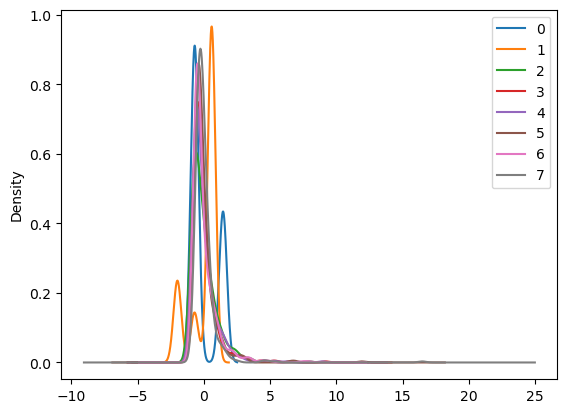

In [8]:
pd.DataFrame(scaler_ss).plot(kind='kde');

In [9]:
scaler_mm = MinMaxScaler().fit_transform(dataf)
scaler_mm[:5]

array([[1.        , 1.        , 0.11294004, 0.13072723, 0.08146416,
        0.0031063 , 0.0654272 , 0.02784731],
       [1.        , 1.        , 0.06289903, 0.13282409, 0.10309667,
        0.02854842, 0.08058985, 0.03698373],
       [1.        , 1.        , 0.05662161, 0.11918086, 0.08278992,
        0.03911643, 0.08605232, 0.16355861],
       [0.        , 1.        , 0.11825445, 0.01553586, 0.04546385,
        0.10484189, 0.01234568, 0.03723404],
       [1.        , 1.        , 0.20162642, 0.07291369, 0.07755155,
        0.063934  , 0.04345483, 0.10809345]])

In [10]:
pd.DataFrame(scaler_mm).describe()

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


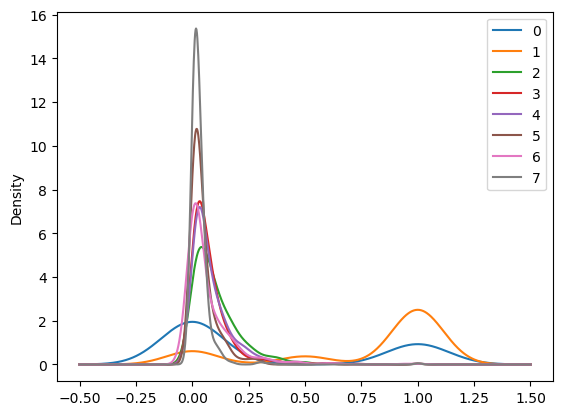

In [11]:
pd.DataFrame(scaler_mm).plot(kind='kde');

**The scaler which was chosen comparing the kde for both the scalers was Minmaxscaler. The reason why minmaxscaler was selected was because it maintains the structure of the data helping in better prediciton , the kde is more understandable for minmaxscaler() compared to standard scaler, minmaxscaler helps in providing a better understanding of the data for this particular dataset.**

### Task 3: To find optimal number of features using RFECV

In [12]:
scaler_mm=pd.DataFrame(scaler_mm)
X=scaler_mm.drop(0,axis=1)
y=scaler_mm[0]

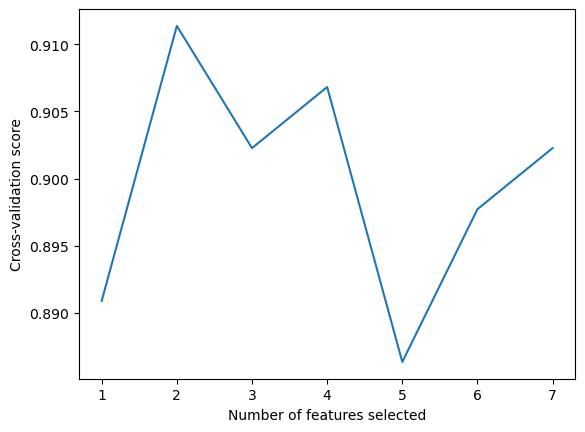

Optimal number of features: 2


In [29]:
xgb = XGBClassifier() 
rfecv = RFECV(estimator=xgb, scoring='accuracy', cv=StratifiedKFold(n_splits=5))
rfecv.fit(X, y)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

optimal_num_features = rfecv.n_features_
print("Optimal number of features:", optimal_num_features)

### Task 4: Implement KMeans Clustering for K=2 to K=15 

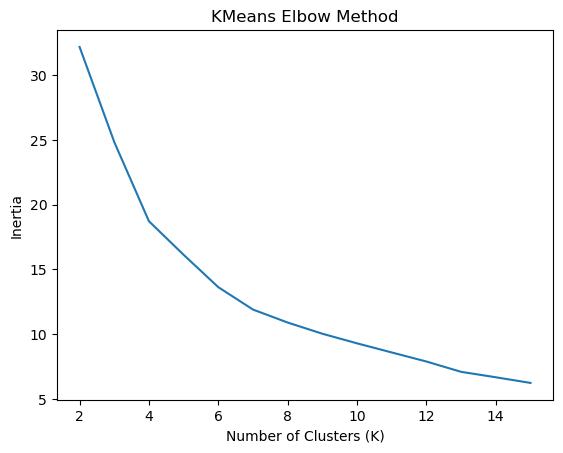

In [27]:
k_values = range(2, 16)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
plt.plot(k_values, inertias)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.show()

**The optimal number of clusters according to the elbow plot is 4 as it bends at 4 and rapidly decreases after the point 4**

### Task 5: Implement PCA with number of original features

Variance explained by the first 2 components: 0.868273371343413
Variance explained by the first 4 components: 0.9697528226560349


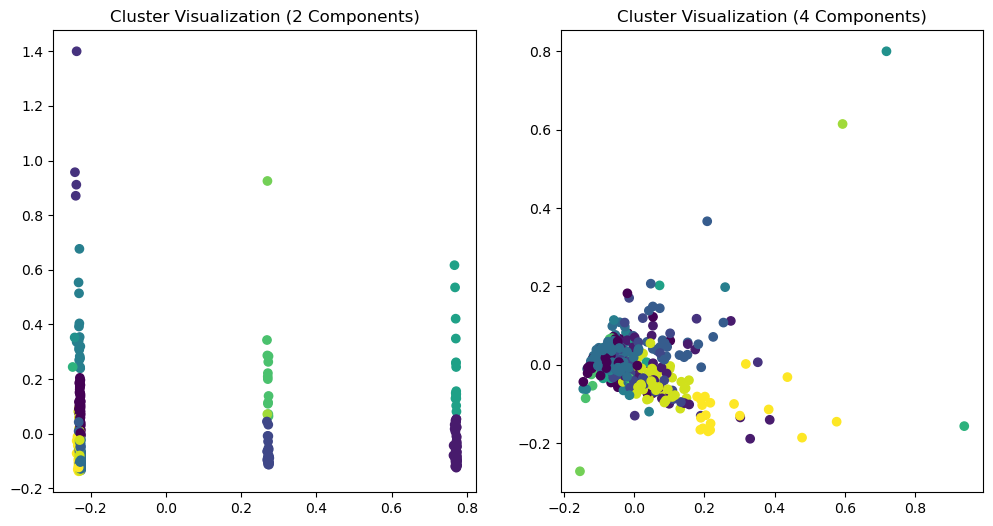

In [28]:
pca = PCA() 
Xp = pca.fit_transform(X)
ev = pca.explained_variance_ratio_

var_2_comp = sum(ev[:2])
var_4_comp = sum(ev[:4])

print("Variance explained by the first 2 components:", var_2_comp)
print("Variance explained by the first 4 components:", var_4_comp)

kmeans.fit(Xp)
cluster_labels = kmeans.labels_

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(Xp[:, 0], Xp[:, 1], c=cluster_labels)
plt.title("Cluster Visualization (2 Components)")

plt.subplot(1, 2, 2)
# plt.scatter(Xp[:, 0], Xp[:, 1], c=cluster_labels)
plt.scatter(Xp[:, 2], Xp[:, 3], c=cluster_labels)
plt.title("Cluster Visualization (4 Components)")

plt.show()

**Variance explained by the first 4 components is better because it has 96.97% variance meaning that the four components collect a considerable quantity of information and maintain the primary patterns and structures seen in the data.and the remaining contributes less**

### Task 6: Implement XGBoost Classifier with 5 Fold CV and report the performance metrics

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb = XGBClassifier()  #This was already defined when trying to find optimum number of features for task 2

In [41]:
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5)

In [42]:
avg_cv_score = np.mean(cv_scores)

In [43]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [48]:
print("Accuracy: ", accuracy)
print("Cross-Validation Scores: ", cv_scores)
print("Average Cross-Validation Score: ", np.mean(cv_scores))
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Accuracy:  0.8977272727272727
Cross-Validation Scores:  [0.95774648 0.94366197 0.91428571 0.9        0.94285714]
Average Cross-Validation Score:  0.9317102615694164
Precision:  0.7692307692307693
Recall:  0.8695652173913043
F1-Score:  0.8163265306122449


**The Accuracy value indicates that the system correctly predicted 89.7% of the data.
The cross validation scores indicate that the model was quite consistent, since the scores are relatively close in range, implying that the model worked well.
Average Cross-Validation Score was calculated to find the average of the 5 cross validation score and it was 0.9317
The precision indicates that the model correctly predicted positive values 76.92% of the time. But the value is not that good as there are possiblities for the model to provide not very excellent values
The recall has measured a value of 86.95% which is fairly high and it suggests that its possibilities of producing erroneous numbers or forecasts is pretty low.
The F1 score is the mean of recall and accuracy, with a value of 81.63% indicating that it is somewhat low. Overall, the accuracy and cross validation scores demonstrate that the XGBClassifier model performed well in this dataset; however, the precision, recall, and F1-Scores indicate that the model may have predicted erroneous positives and negatives.**
